In [3]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [6]:
beijing=pd.read_csv("beijingPM.csv", usecols=['year','month','day','hour','pm2.5','DEWP','TEMP','PRES'])

In [7]:
beijing.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES
0,2010,1,1,0,NaN,-21,-11.0,1021.0
1,2010,1,1,1,NaN,-21,-12.0,1020.0
2,2010,1,1,2,NaN,-21,-11.0,1019.0
3,2010,1,1,3,NaN,-21,-14.0,1019.0
4,2010,1,1,4,NaN,-20,-12.0,1018.0


In [8]:
beijing.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000


In [9]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.7 MB


In [10]:
beijing.isnull().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
dtype: int64

In [13]:
beijing=beijing.dropna()

In [14]:
beijing.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
dtype: int64

In [15]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41757 entries, 24 to 43823
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    41757 non-null  int64  
 1   month   41757 non-null  int64  
 2   day     41757 non-null  int64  
 3   hour    41757 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    41757 non-null  int64  
 6   TEMP    41757 non-null  float64
 7   PRES    41757 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.9 MB


In [16]:
beijing.tail()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES
43819,2014,12,31,19,8.0,-23,-2.0,1034.0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0
43823,2014,12,31,23,12.0,-21,-3.0,1034.0


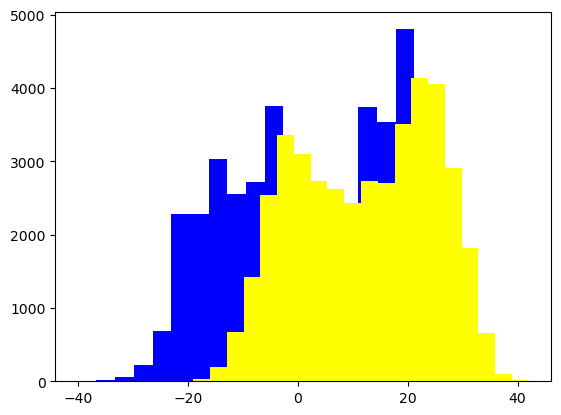

In [27]:
#plt.hist(beijing['pm2.5'], bins=20, color='red')
plt.hist(beijing['DEWP'], bins=20, color='blue')
plt.hist(beijing['TEMP'], bins=20, color='yellow')
#plt.hist(beijing['PRES'], bins=20, color='red')

plt.show()

In [35]:
beijing.corr()


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES
year,1.000000,-0.002452,-0.000103,0.000200,-0.014690,0.007298,0.055656,-0.013466
month,-0.002452,1.000000,0.006901,-0.000543,-0.024069,0.234492,0.172135,-0.066317
day,-0.000103,0.006901,1.000000,0.000327,0.082788,0.033537,0.022871,-0.010497
hour,0.000200,-0.000543,0.000327,1.000000,-0.023116,-0.021784,0.149443,-0.041831
pm2.5,-0.014690,-0.024069,0.082788,-0.023116,1.000000,0.171423,-0.090534,-0.047282
DEWP,0.007298,0.234492,0.033537,-0.021784,0.171423,1.000000,0.823821,-0.777722
TEMP,0.055656,0.172135,0.022871,0.149443,-0.090534,0.823821,1.000000,-0.826903
PRES,-0.013466,-0.066317,-0.010497,-0.041831,-0.047282,-0.777722,-0.826903,1.000000


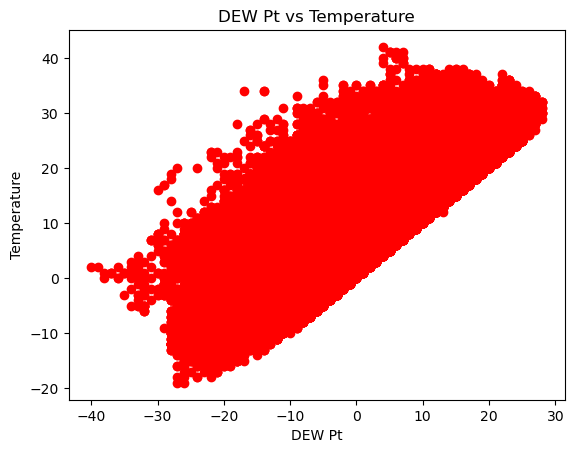

In [44]:
plt.scatter(beijing['DEWP'],beijing['TEMP'], color='red')
plt.title("DEW Pt vs Temperature")
plt.xlabel("DEW Pt")
plt.ylabel("Temperature")
plt.show()

In [41]:
beijing.TEMP.min()

-19.0

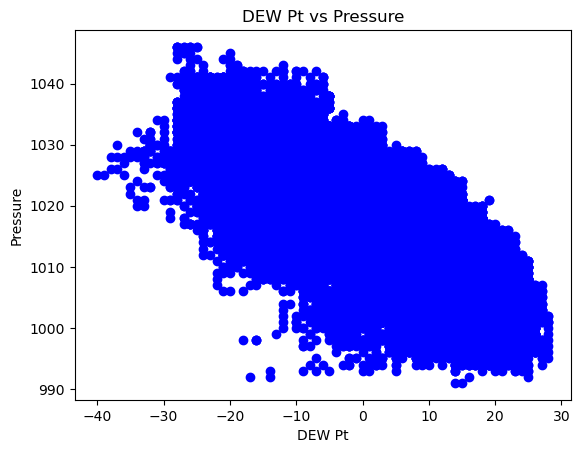

In [45]:
plt.scatter(beijing['DEWP'],beijing['PRES'], color='blue')
plt.title("DEW Pt vs Pressure")
plt.xlabel("DEW Pt")
plt.ylabel("Pressure")
plt.show()

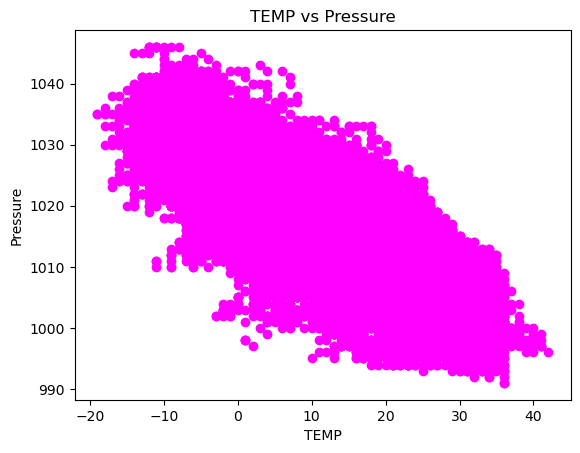

In [64]:
plt.scatter(beijing['TEMP'],beijing['PRES'], color='magenta')
plt.title("TEMP vs Pressure")
plt.xlabel("TEMP")
plt.ylabel("Pressure")
plt.show()

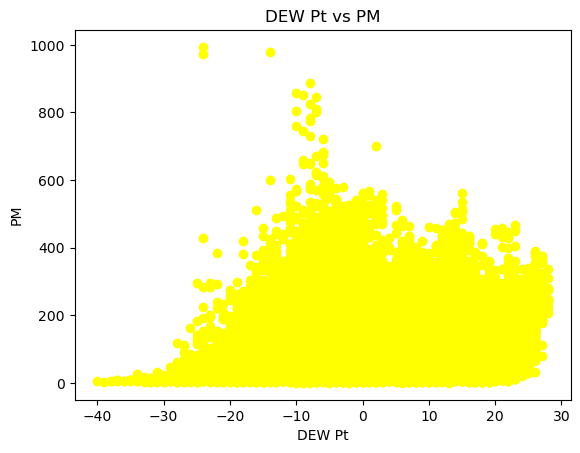

In [47]:
plt.scatter(beijing['DEWP'],beijing['pm2.5'], color='yellow')
plt.title("DEW Pt vs PM")
plt.xlabel("DEW Pt")
plt.ylabel("PM")
plt.show()

In [69]:
beijing[beijing['DEWP']>0].count()

year     21758
month    21758
day      21758
hour     21758
pm2.5    21758
DEWP     21758
TEMP     21758
PRES     21758
dtype: int64

### We can fit a Linear regression model (or a Multivariate regression model) to predict the Dew point from Temp and Pressure values